In [1]:
pip install tensorflow numpy matplotlib

Training baseline model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9094 - loss: 0.3040 - val_accuracy: 0.9836 - val_loss: 0.0547
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9841 - loss: 0.0532 - val_accuracy: 0.9848 - val_loss: 0.0454
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9850 - val_loss: 0.0433
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9938 - loss: 0.0208 - val_accuracy: 0.9864 - val_loss: 0.0412
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9963 - loss: 0.0126 - val_accuracy: 0.9875 - val_loss: 0.0384
Baseline model training complete!
Training L1 & L2 Regularization model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.7460 - loss: 6.8838 - val_accuracy: 0.8620 - val_loss: 1.6672
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.8800 - loss: 1.6334 - val_accuracy: 0.8982 

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8664 - val_loss: 0.4019
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8408 - loss: 0.4851 - val_accuracy: 0.9017 - val_loss: 0.3007
Data Augmentation model training complete!
Training Combined Regularization model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.1123 - loss: 7.7117 - val_accuracy: 0.1135 - val_loss: 3.0954
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1135 - val_loss: 3.0954
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.1146 - loss: 3.1154 - val_accuracy: 0.1135 - val_loss: 3.1273
Combined Regularization model training complete!


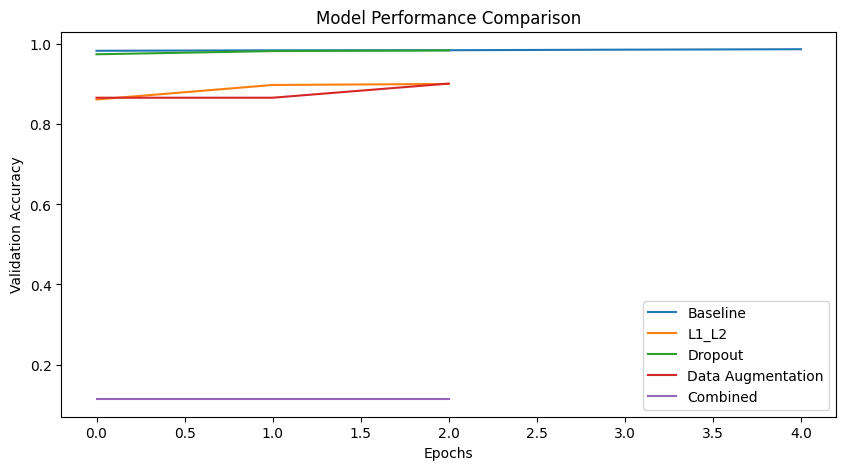

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1]
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Function to build a baseline CNN model (No Regularization)
def build_baseline_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("Training baseline model...")
baseline_model = build_baseline_model()
history_baseline = baseline_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, callbacks=[early_stopping])
print("Baseline model training complete!")

# Function to build a model with L1 and L2 Regularization
def build_l1_l2_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("Training L1 & L2 Regularization model...")
l1_l2_model = build_l1_l2_model()
history_l1_l2 = l1_l2_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, callbacks=[early_stopping])
print("L1 & L2 regularization model training complete!")

# Function to build a model with Dropout
def build_dropout_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("Training Dropout model...")
dropout_model = build_dropout_model()
history_dropout = dropout_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, callbacks=[early_stopping])
print("Dropout model training complete!")

# Apply Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(x_train)

print("Training model with Data Augmentation...")
augmented_model = build_baseline_model()
history_augmented = augmented_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                        validation_data=(x_test, y_test), epochs=5,
                                        steps_per_epoch=len(x_train)//32, callbacks=[early_stopping])
print("Data Augmentation model training complete!")

# Function to build a model with Combined Regularization (L2 + Dropout)
def build_combined_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        MaxPooling2D((2,2)),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

print("Training Combined Regularization model...")
combined_model = build_combined_model()
history_combined = combined_model.fit(datagen.flow(x_train, y_train, batch_size=32),
                                      validation_data=(x_test, y_test), epochs=5,
                                      steps_per_epoch=len(x_train)//32, callbacks=[early_stopping])
print("Combined Regularization model training complete!")

# Plot Accuracy Comparison
plt.figure(figsize=(10,5))
plt.plot(history_baseline.history['val_accuracy'], label='Baseline')
plt.plot(history_l1_l2.history['val_accuracy'], label='L1_L2')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.plot(history_augmented.history['val_accuracy'], label='Data Augmentation')
plt.plot(history_combined.history['val_accuracy'], label='Combined')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()
